In [1]:
import pandas
from math import sqrt
import matplotlib.pyplot as plt
import os

array([[<AxesSubplot:title={'center':'prob_comp'}>]], dtype=object)

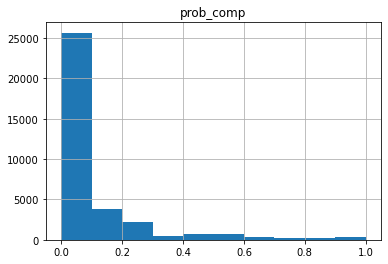

In [2]:
columns=["id", "context", "begin", "end", "token", "native_annotators", "non-native_annotators", "native_comp", "non-native_comp", "bin_comp", "prob_comp"]

dfs = []
for file in os.listdir("CWI_2018"):
    df_tmp = pandas.read_csv("CWI_2018/" +file ,sep='\t',names=columns)
    dfs.append(df_tmp)

df = pandas.concat(dfs,ignore_index=True)

df.hist(column="prob_comp")

In [3]:
def subj(x):
    zeros = [0] * (20 - int(x*20))
    ones  = [1] * int(x*20)
    subj = sum([abs(x - i) for i in zeros])
    subj += sum([abs(x - i) for i in ones])
    subj /= 20.0
    return subj

In [4]:
df['subjectivity'] = df.prob_comp.apply(subj)

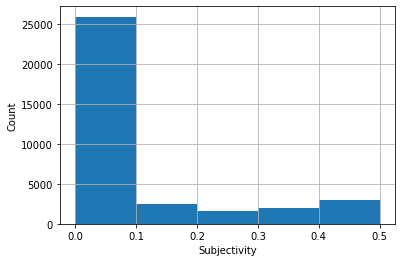

In [5]:
plot = df.subjectivity.hist(bins=5)
plot.set_xlabel("Subjectivity")
plot.set_ylabel("Count")
plot.figure.savefig("Figures/CWI_2018_Hist.pdf")

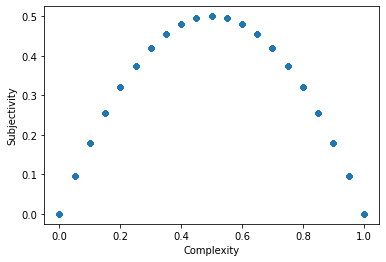

In [6]:
plot = df.plot.scatter(x='prob_comp',y='subjectivity')
plot.set_xlabel("Complexity")
plot.set_ylabel("Subjectivity")
plot.figure.savefig("Figures/CWI_2018_Scatter.pdf")


In [7]:
alpha = 0.0025
L = 2
N = 20
T_subj = alpha * L * N
print(T_subj)

0.1


In [8]:
df['subjective'] = df.subjectivity > T_subj

In [9]:
alphas = [] 
xs = []
ys = []
for alpha in range(0,250):
    alpha /= 10000
    T_subj = alpha * L * N
    y = sum(df.subjectivity > T_subj)/len(df.subjectivity)
    alphas.append(alpha)
    xs.append(T_subj)
    ys.append(y) 

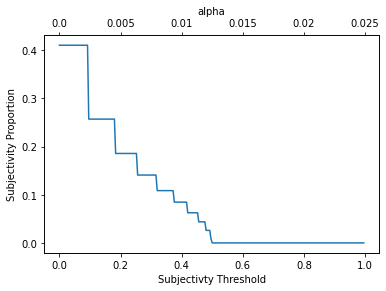

In [10]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()


ax1.plot(xs,ys)
ax1.set_xlabel('Subjectivty Threshold')
ax1.set_ylabel("Subjectivity Proportion")

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks([0,0.2,0.4,0.6,0.8,1])
ax2.set_xticklabels([0.0,0.005,0.01,0.015,0.02,0.025])
ax2.set_xlabel("alpha")


plt.show()
fig.savefig("Figures/CWI_2018_threshold.pdf")

In [11]:
df.to_pickle("cwi_2018.pkl")